In [23]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import klib as kl

In [2]:
#Importing the training and test dataset
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [5]:
#Seeing the info of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
#Checking for null columns
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
#checking for duplicates
train_df.duplicated().sum()

0

In [12]:
#Checking the stats of the dataset
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Seeing the columns in the training dataset
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [29]:
#Checking the unique values in each column
for col in train_df.columns:
    print("The column",col,"has", train_df[col].nunique()," unique values")

The column duration has 758  unique values
The column protocol_type has 3  unique values
The column service has 66  unique values
The column flag has 11  unique values
The column src_bytes has 1665  unique values
The column dst_bytes has 3922  unique values
The column land has 2  unique values
The column wrong_fragment has 3  unique values
The column urgent has 2  unique values
The column hot has 22  unique values
The column num_failed_logins has 5  unique values
The column logged_in has 2  unique values
The column num_compromised has 28  unique values
The column root_shell has 2  unique values
The column su_attempted has 3  unique values
The column num_root has 28  unique values
The column num_file_creations has 20  unique values
The column num_shells has 2  unique values
The column num_access_files has 7  unique values
The column num_outbound_cmds has 1  unique values
The column is_host_login has 1  unique values
The column is_guest_login has 2  unique values
The column count has 466

In [17]:
#seeing the target column
train_df['class'].unique()

array(['normal', 'anomaly'], dtype=object)

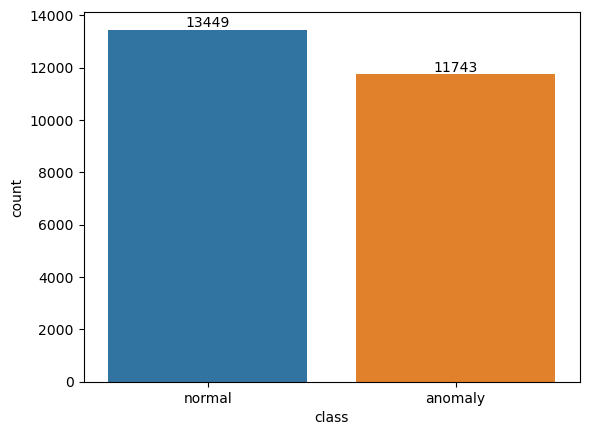

In [20]:
#Checking the distribution of the target column
ax=sns.countplot(data=train_df,x='class')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [30]:
#Encoding the columns
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [31]:
label_encoding(train_df)

In [41]:
#Checking the test dataset
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [42]:
#Checking for dupliacate values in the test data
test_df.duplicated().sum()

57

In [44]:
#droppping duplicate values from test data
test_df.drop_duplicates(inplace=True)

In [45]:
test_df.shape

(22487, 41)

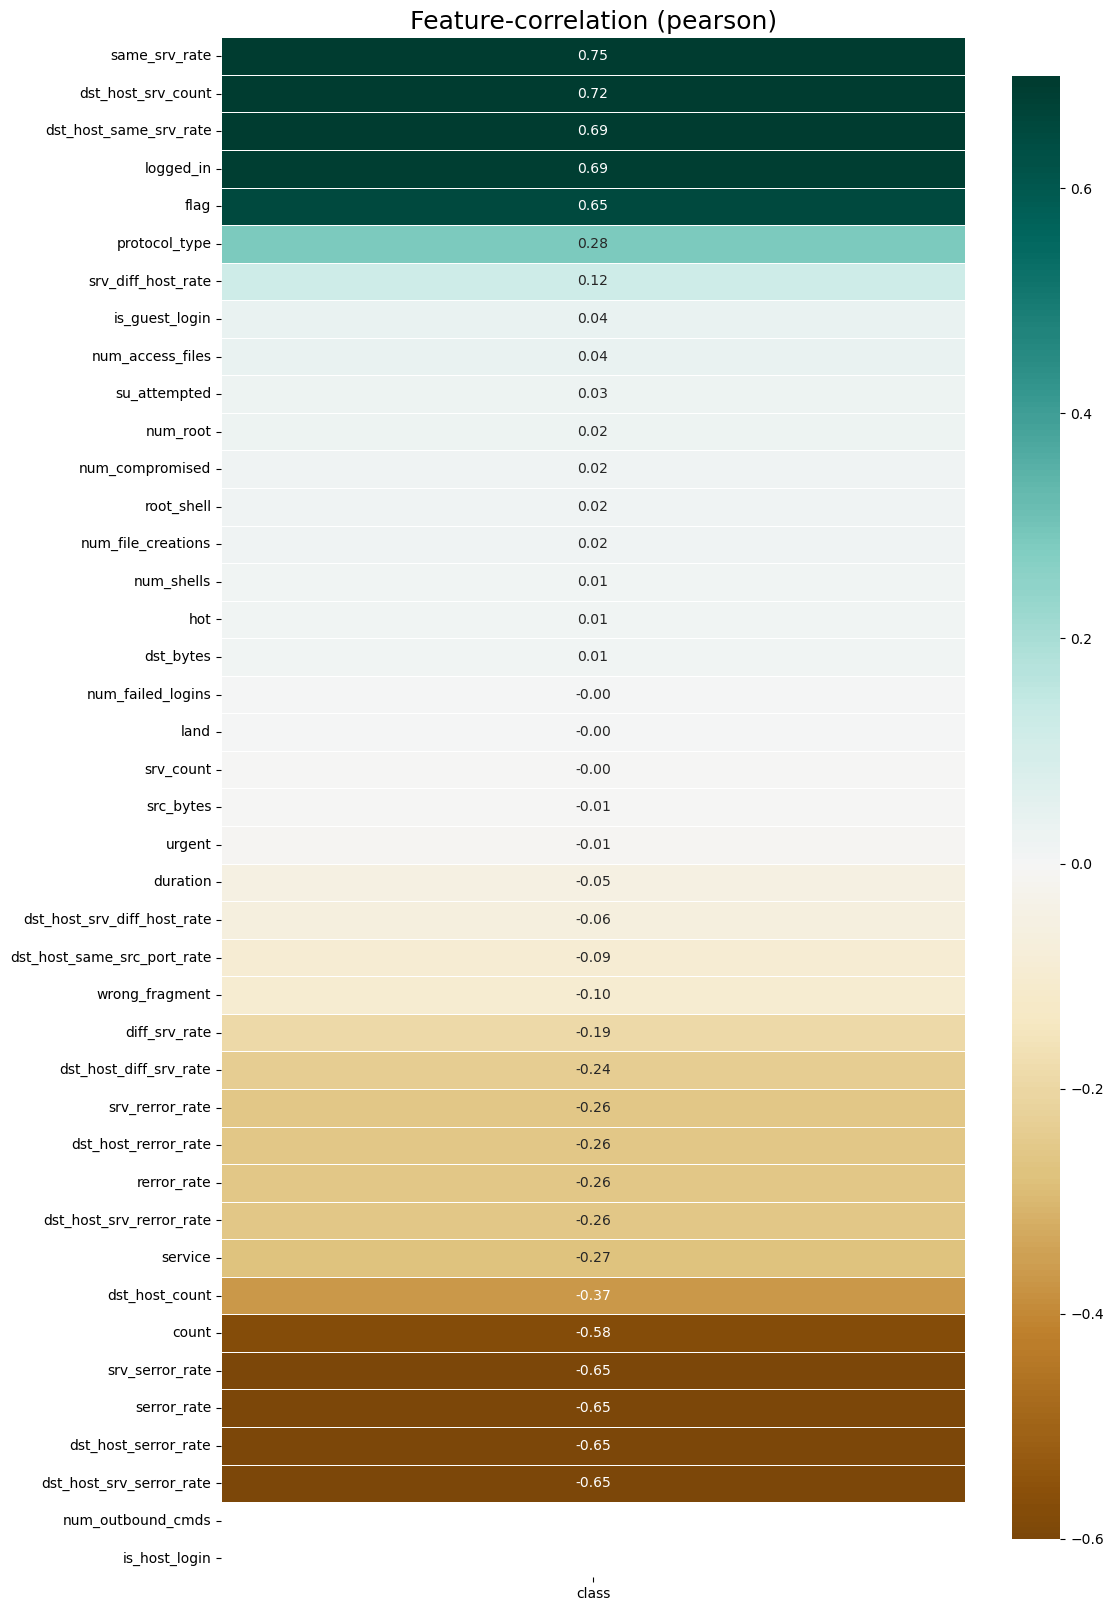

In [33]:
#Correlation plot on train data
kl.corr_plot(train_df, figsize=(12,20),target='class')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['class'], axis=1)
y = train_df['class']

In [36]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [37]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

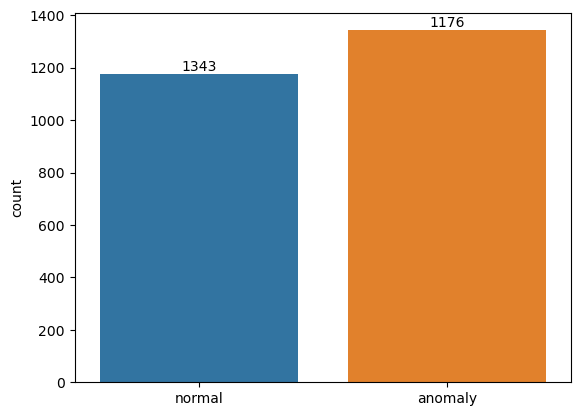

In [38]:
df = pd.DataFrame(X)
df["class"] = pd.DataFrame(y)
df = df.sample(frac=0.1)

ax = sns.countplot(x=df["class"])
abs_values = df["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

X_sample = df.drop(['class'], axis=1).to_numpy()
y_sample = df['class'].to_numpy()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']); 
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()

# OneClassSVM

7327  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9378
           1       0.79      0.94      0.86     10775

    accuracy                           0.84     20153
   macro avg       0.85      0.83      0.83     20153
weighted avg       0.85      0.84      0.83     20153



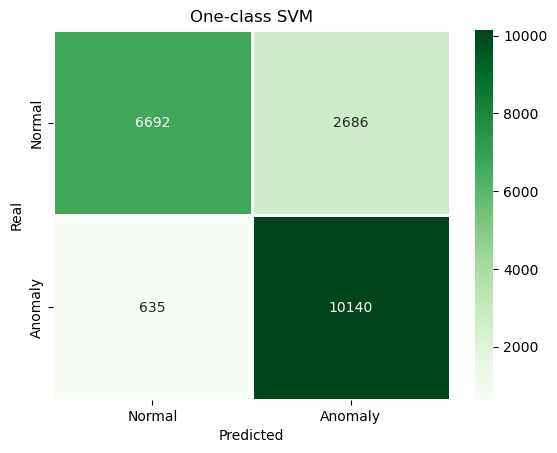

In [40]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "One-class SVM")

921  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1197
           1       0.78      0.94      0.86      1323

    accuracy                           0.83      2520
   macro avg       0.85      0.83      0.83      2520
weighted avg       0.85      0.83      0.83      2520



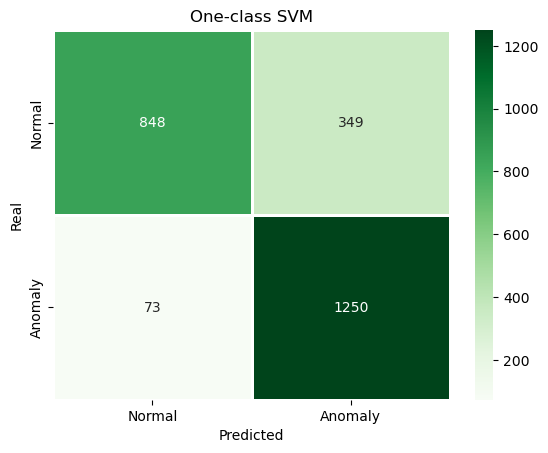

In [46]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "One-class SVM")

# LocalOutlierFactor

1158  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.35      0.04      0.08      9378
           1       0.53      0.93      0.67     10775

    accuracy                           0.52     20153
   macro avg       0.44      0.49      0.38     20153
weighted avg       0.45      0.52      0.40     20153



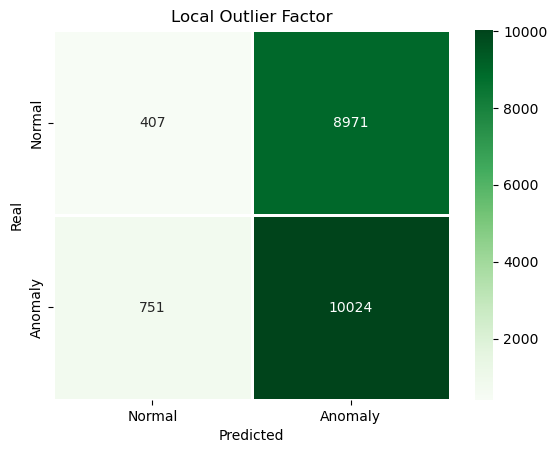

In [47]:
from sklearn.neighbors import LocalOutlierFactor

predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_train)
print_stats(predictions, X_train, y_train, "Local Outlier Factor")

315  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.45      0.12      0.19      1197
           1       0.52      0.87      0.65      1323

    accuracy                           0.51      2520
   macro avg       0.49      0.49      0.42      2520
weighted avg       0.49      0.51      0.43      2520



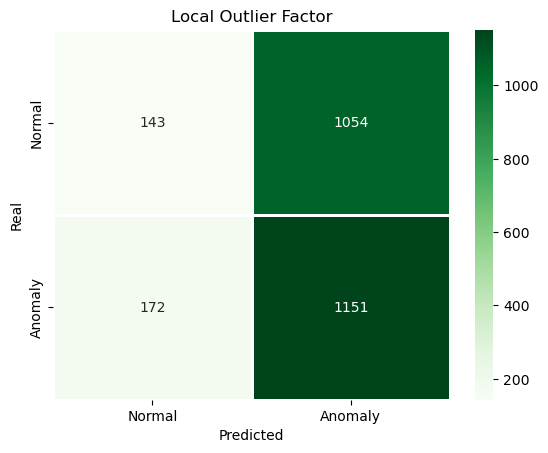

In [48]:
predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_test)
print_stats(predictions, X_test, y_test, "Local Outlier Factor")

# IsolationForest

1993  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.66      0.14      0.23      9378
           1       0.56      0.94      0.70     10775

    accuracy                           0.57     20153
   macro avg       0.61      0.54      0.46     20153
weighted avg       0.60      0.57      0.48     20153



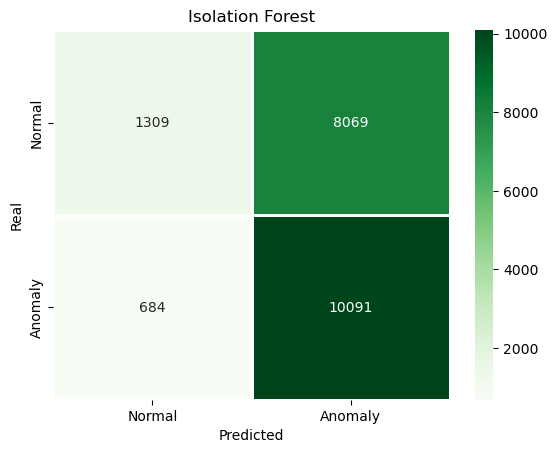

In [49]:
from sklearn.ensemble import IsolationForest

model = IsolationForest().fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "Isolation Forest")

251  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.71      0.15      0.25      1197
           1       0.55      0.95      0.70      1323

    accuracy                           0.57      2520
   macro avg       0.63      0.55      0.47      2520
weighted avg       0.63      0.57      0.48      2520



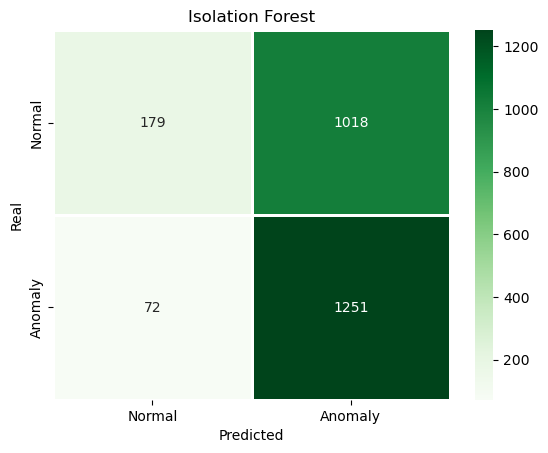

In [50]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "Isolation Forest")

# Deep Learning Model

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, losses

X_train_normal = X_train[y_train == 1]
X_valid_normal = X_valid[y_valid == 1]
input = tf.keras.layers.Input(shape=(41,))
encoder = tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)
decoder = tf.keras.Sequential([
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(41, activation="sigmoid")])(encoder)
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [52]:
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal, 
          epochs=20, 
          batch_size=256,
          validation_data=(X_valid_normal, X_valid_normal),
          shuffle=True)


Epoch 1/20

43/43 [==============================] - 6s 18ms/step - loss: 6.2879 - val_loss: 6.4450
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 6.0567 - val_loss: 6.1675
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9294 - val_loss: 6.1566
Epoch 4/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9250 - val_loss: 6.1542
Epoch 5/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9231 - val_loss: 6.1527
Epoch 6/20
43/43 [==============================] - 0s 7ms/step - loss: 5.9213 - val_loss: 6.1507
Epoch 7/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9190 - val_loss: 6.1489
Epoch 8/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9151 - val_loss: 6.1428
Epoch 9/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9105 - val_loss: 6.1407
Epoch 10/20
43/43 [==============================] - 0s 6ms/step - loss: 5.9086 - val_loss: 6.1388
Epoch 11/20
43/4

79/79 [==============================] - 0s 3ms/step
14  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.93      0.01      0.02      1197
           1       0.53      1.00      0.69      1323

    accuracy                           0.53      2520
   macro avg       0.73      0.51      0.36      2520
weighted avg       0.72      0.53      0.37      2520



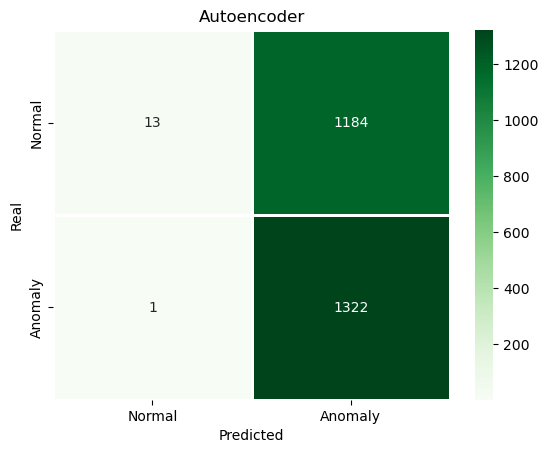

In [53]:
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.max(valid_loss)

# Detect anomalies in the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([-1 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "Autoencoder")